In [53]:
import pandas as pd
import numpy as np
import wget
import matplotlib.pyplot as plt
import seaborn as sns

## *`Download the Dataset`*

In [54]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
file = wget.download(url)

print(f"File {file} -> Downloaded Successfully")

File course_lead_scoring (1).csv -> Downloaded Successfully


## *`Data Overview`*

In [55]:
df = pd.read_csv('course_lead_scoring.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()
print(df.shape)

df.head()

(1462, 9)


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


## *`Data Preparation`*
- Check if the missing values are presented in the features.
- If there are missing values:
    - For categorical features, replace them with 'NA'
    - For numerical features, replace with with 0.0

In [57]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

### *`Handle Missing values`*

In [58]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(0.0)

for col in cat_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna('NA')

print(df.isna().sum())
df.head()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


## *`Q1`*
- What is the most frequent observation (mode) for the column industry?

In [59]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

## *`Q2`*
- Create the correlation matrix for the numerical features of your dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features.

- What are the two features that have the biggest correlation?
    * interaction_count and lead_score
    * number_of_courses_viewed and lead_score
    * number_of_courses_viewed and interaction_count
    * annual_income and interaction_count

In [60]:
# interaction_count and lead_score
round(df['interaction_count'].corr(df['lead_score']), 5)

np.float64(0.00989)

In [61]:
# number_of_courses_viewed and lead_score
round(df['number_of_courses_viewed'].corr(df['lead_score']), 5)

np.float64(-0.00488)

In [62]:
# number_of_courses_viewed and interaction_count
round(df['number_of_courses_viewed'].corr(df['interaction_count']), 5)

np.float64(-0.02357)

In [63]:
# annual_income and interaction_count
round(df['annual_income'].corr(df['interaction_count']), 5)

np.float64(0.02704)

#### *`Another Solution`*

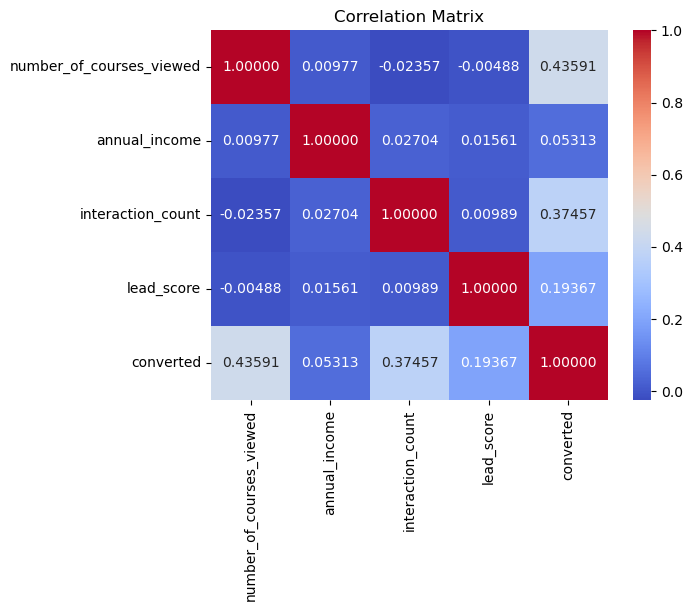

In [64]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='1.5f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## *`Split the data`*
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value converted is not in your dataframe.

In [65]:
X = df.drop('converted', axis=1)
y = df['converted']

X, y

(         lead_source       industry  number_of_courses_viewed  annual_income  \
 0           paid_ads             NA                         1        79450.0   
 1       social_media         retail                         1        46992.0   
 2             events     healthcare                         5        78796.0   
 3           paid_ads         retail                         2        83843.0   
 4           referral      education                         3        85012.0   
 ...              ...            ...                       ...            ...   
 1457        referral  manufacturing                         1            0.0   
 1458        referral     technology                         3        65259.0   
 1459        paid_ads     technology                         1        45688.0   
 1460        referral             NA                         5        71016.0   
 1461  organic_search        finance                         3        92855.0   
 
      employment_status   

In [66]:
from sklearn.model_selection import train_test_split

# Split dataset into 60% Training & 40% (For Validation and Testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split the 40% dataset into 20% Validation & 20% Test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train Size = {len(X_train)}")
print(f"Validation Size = {len(X_val)}")
print(f"Test Size = {len(X_test)}")

Train Size = 877
Validation Size = 292
Test Size = 293


#### *`Importance of Stratify = y`*
- Split the data so that the same distribution of classes is present in each group (train, test, val).

- This means that if 10% of the rows were converted = 1 in the original data, the exact same ratio will remain in each split (train, val, test).

- This is very useful for classification so that the model is not affected by class bias.

## *`Q3`*
- Calculate the mutual information score between converted and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).
- Which of these variables has the biggest mutual information score?

    * industry
    * location
    * lead_source
    * employment_status

In [67]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X_train_cat = X_train[cat_cols]
X_train_cat_encoded = X_train_cat.copy()

for col in cat_cols:
    X_train_cat_encoded[col] = LabelEncoder().fit_transform(X_train_cat_encoded[col])


mi_scores = mutual_info_classif(X_train_cat_encoded, y_train, discrete_features=True)


mi_results = pd.DataFrame({
    'Feature': cat_cols,
    'MI_Score': [round(score, 2) for score in mi_scores]
}).sort_values(by='MI_Score', ascending=False)

print(mi_results)

             Feature  MI_Score
0        lead_source      0.03
1           industry      0.01
2  employment_status      0.01
3           location      0.00


In [68]:
mi_scores

array([0.02716127, 0.01378792, 0.00711506, 0.00134651])

#### *`Mutual Information`*
- How much does knowing the value of variable X help me learn something about variable Y?"

- In other words:
    - If the MI is high, this variable is very useful for predicting Y.

    - If the MI is low, this variable doesn't make much of a difference in predicting Y.

## *`Q4`*
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    - Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

- What accuracy did you get?

    * 0.64
    * 0.74
    * 0.84
    * 0.94

In [69]:
# Categorical Encoding using One-Hot
for col in cat_cols:
    print(col, '\n', df[col].nunique())
    print(df[col].unique()[:5])
    print("="*40)

lead_source 
 6
['paid_ads' 'social_media' 'events' 'referral' 'organic_search']
industry 
 8
['NA' 'retail' 'healthcare' 'education' 'manufacturing']
employment_status 
 5
['unemployed' 'employed' 'NA' 'self_employed' 'student']
location 
 8
['south_america' 'australia' 'europe' 'africa' 'middle_east']


In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define Features and Target
X, y = df.drop('converted', axis=1), df['converted']

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', ohe, cat_cols)
    ]
)

In [71]:
# Split again the dataset into train, validtion, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [72]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Accuracy of Logistic Regression = 0.84
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       111
           1       0.86      0.88      0.87       181

    accuracy                           0.84       292
   macro avg       0.83      0.82      0.82       292
weighted avg       0.83      0.84      0.83       292



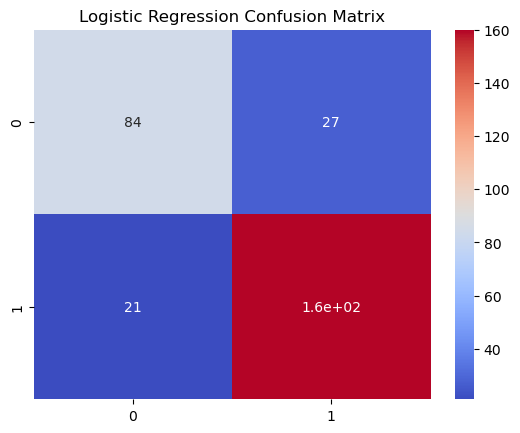

In [73]:
y_pred_val = clf.predict(X_val)

cm = confusion_matrix(y_val, y_pred_val)
cr = classification_report(y_val, y_pred_val)
original_accuracy = accuracy_score(y_val, y_pred_val)

print(f"Accuracy of Logistic Regression = {round(original_accuracy, 2)}")
print(f"Logistic Regression Classification Report\n{cr}")
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## *`Q5`*
- Let's find the least useful feature using the feature elimination technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?

    * 'industry'
    * 'employment_status'
    * 'lead_score'

- Note: The difference doesn't have to be positive.

In [74]:
cols = X.columns

# Dictionary to store the difference between original accuracy and accuracy without this column
differences = {}

for col in cols:
    # New Features without one
    X_reduced = X.drop(columns=[col])

    # New Column Transformer without this column
    preprocessor_reduced = ColumnTransformer(
        transformers=[
            ('num', scaler, [c for c in num_cols if c != col]),
            ('cat', ohe, [c for c in cat_cols if c != col])
        ],
        remainder='drop'
    )

    clf_reduced = Pipeline(
        steps=[
            ('preprocessor', preprocessor_reduced),
            ('model', model)
        ]
    )

    clf_reduced.fit(X_train[X_reduced.columns], y_train)
    y_pred = clf_reduced.predict(X_val[X_reduced.columns])
    acc = accuracy_score(y_val, y_pred)

    # Subtract the accuracy from original accuracy
    differences[col] = round(original_accuracy - acc, 4)

for col, diff in differences.items():
    print(f"Without ``{col}`` -> Accuaracy Difference = {diff}")

Without ``lead_source`` -> Accuaracy Difference = 0.0274
Without ``industry`` -> Accuaracy Difference = 0.0205
Without ``number_of_courses_viewed`` -> Accuaracy Difference = 0.1096
Without ``annual_income`` -> Accuaracy Difference = -0.0034
Without ``employment_status`` -> Accuaracy Difference = 0.0274
Without ``location`` -> Accuaracy Difference = 0.0034
Without ``interaction_count`` -> Accuaracy Difference = 0.0651
Without ``lead_score`` -> Accuaracy Difference = 0.024


## *`Q6`*
- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.
- Which of these C leads to the best accuracy on the validation set?

    * 0.01
    * 0.1
    * 1
    * 10
    * 100
- Note: If there are multiple options, select the smallest C.

In [75]:
C = [0.01, 0.1, 1, 10, 100]
accs = {}

for c in C:
    model = model = LogisticRegression(solver='liblinear', C=c , max_iter=1000, random_state=42)
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ("model", model)
    ])

    clf.fit(X_train, y_train)

    y_pred_val = clf.predict(X_val)
    acc = round(accuracy_score(y_val, y_pred_val), 3)
    accs[c] = acc

for c, acc in accs.items():
    print(f"For C = {c} -> Accuracy = {acc}")

For C = 0.01 -> Accuracy = 0.805
For C = 0.1 -> Accuracy = 0.815
For C = 1 -> Accuracy = 0.836
For C = 10 -> Accuracy = 0.842
For C = 100 -> Accuracy = 0.846
